In [1]:
%matplotlib inline 
from pylab import *
import skimage
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures
from skimage import filters, io
import sys
import math
import cv2 as cv
import numpy as np


In [2]:

planes0 = [
    'IMG_20191107_102855.jpg',
'IMG_20191107_102852.jpg',
'IMG_20191107_102844.jpg',
'IMG_20191107_102828.jpg',
'IMG_20191107_102826.jpg',
'IMG_20191107_102810.jpg',
'IMG_20191107_102807.jpg',
'IMG_20191107_102759.jpg',
'IMG_20191107_102755.jpg',
'IMG_20191107_102751.jpg',
'IMG_20191107_102750.jpg',
'IMG_20191107_102644.jpg',
'IMG_20191107_102631.jpg',
'IMG_20191107_102613.jpg',
'IMG_20191107_102609.jpg',
'IMG_20191107_102606.jpg',
'IMG_20191107_102555.jpg',
'IMG_20191107_102552.jpg',
'IMG_20191107_102548.jpg',
'IMG_20191107_102243.jpg',
'IMG_20191107_102239.jpg',
'IMG_20191107_102226.jpg',
'IMG_20191107_102149.jpg',
'IMG_20191107_102120.jpg',
'IMG_20191107_102100.jpg',
'IMG_20191107_101755.jpg',
'IMG_20191107_101712.jpg',
'IMG_20191107_101706.jpg',
'IMG_20191107_101657.jpg',
'IMG_20191107_101645.jpg',
'IMG_20191107_101645(1).jpg',
'IMG_20191107_102425_005.jpg',
'IMG_20191107_102845_1.jpg']

planes1 = [
    'IMG_20191107_102855.jpg',
'IMG_20191107_102852.jpg',
'IMG_20191107_102844.jpg',
'IMG_20191107_102828.jpg',
'IMG_20191107_102826.jpg',
'IMG_20191107_102810.jpg']
planes1 = [
    'IMG_20191107_102855.jpg']
planes = []
for plane in planes1:
    planes.append('Zdjęcia pięciolinia/5/' + plane)
print(planes)

['Zdjęcia pięciolinia/5/IMG_20191107_102855.jpg']


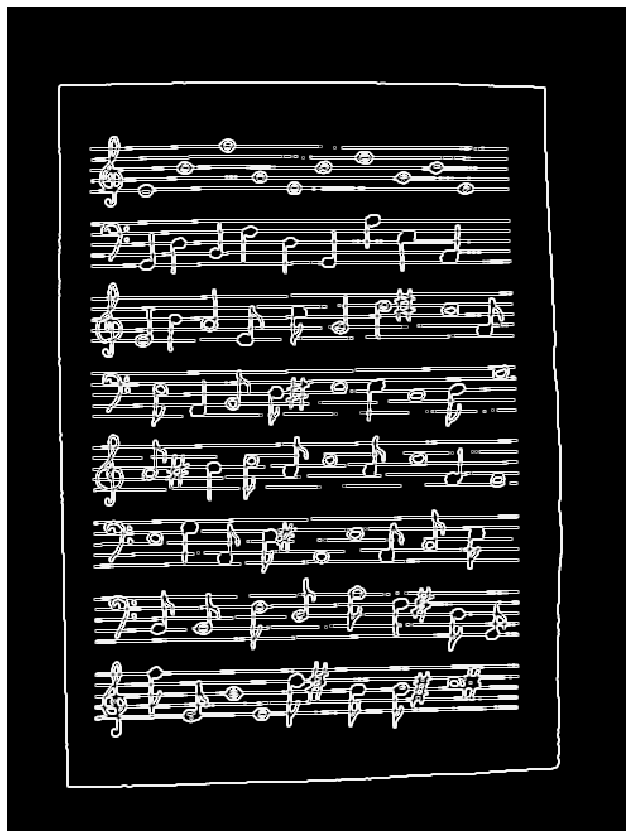

In [3]:
plt.figure(figsize=(50,26))
plt.subplots_adjust(left=0, bottom=0,right=0.985,hspace=0,wspace=0)
i = 1
t = 140
for path in planes:
    image = skimage.io.imread(path, as_gray=True)
    image = image > filters.threshold_otsu(image)
    image = filters.sobel(image)
    #image = mp.erosion(mp.dilation(image))    

    plot = plt.subplot(2,3,i)
    i += 1
    plt.imshow(image,cmap="Greys_r")
    plt.axis("off")
    

In [4]:
filename = planes[0]
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
#489, 652
dst = cv.Canny(src, 50, 200, None, 3)
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

cv.imshow("Source", src)
cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
filename = planes[0]
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
print(src)
cv.imshow("Source", src)
cv.waitKey(0)
cv.destroyAllWindows()
